In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import os

In [89]:
dataPath = os.path.join(os.getcwd(), 'medical_examination.csv')
dataPath

'C:\\Users\\THIS PC\\Projects\\Learning\\Medical Data Visualizer\\medical_examination.csv'

In [90]:
df = pd.read_csv(dataPath, index_col='id')
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


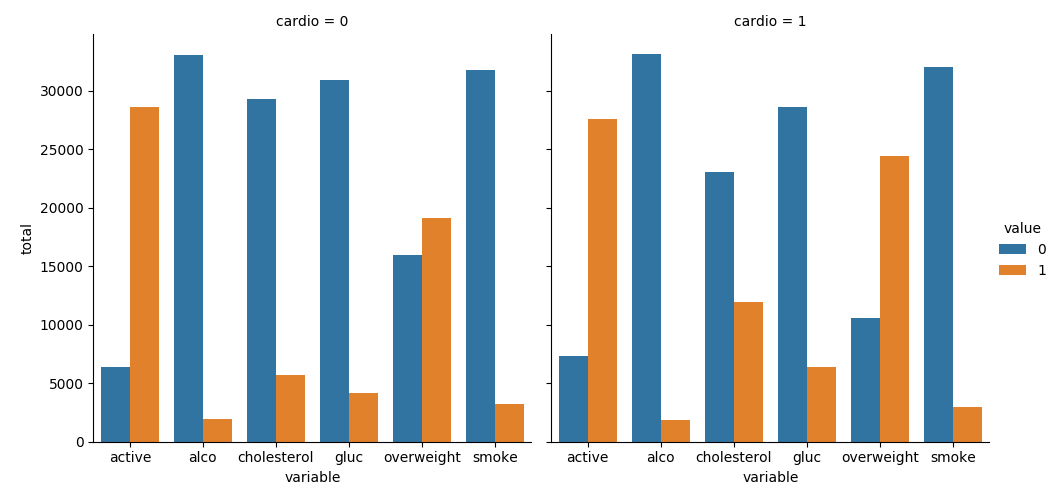

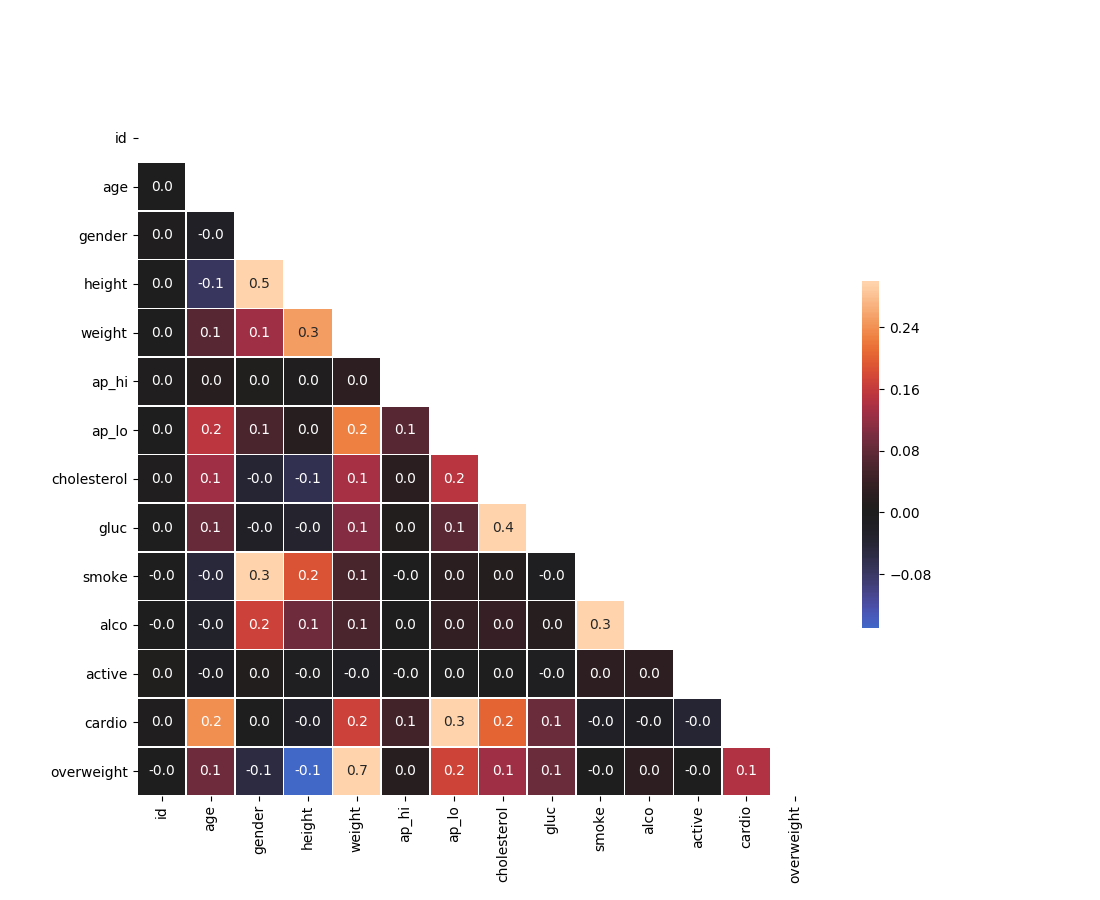

In [91]:
display(Image(filename=os.path.join(os.getcwd(), 'Figure_1.png')))
display(Image(filename=os.path.join(os.getcwd(), 'Figure_2.png')))

In [93]:
BMI = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (BMI > 25).astype(int)
df[['cholesterol', 'gluc']] = (~(df[['cholesterol', 'gluc']] == 1)).astype(int)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [94]:
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # 6
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()
    df_cat = df_cat.rename(columns={'size': 'total'})

    # 7
    # 8
    fig = sns.catplot(data=df_cat,
                      x='variable',
                      y='total',
                      hue='value',
                      col='cardio',
                      kind='bar')

    # 9
    fig.savefig('catplot.png')
    return fig

In [95]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()
df_cat = df_cat.rename(columns={'size': 'total'})
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


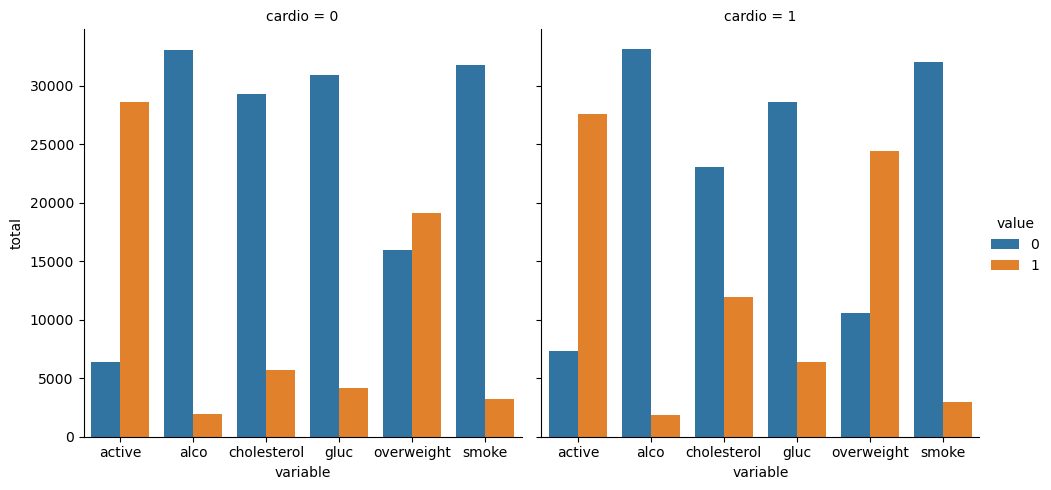

In [96]:
draw_cat_plot()

In [111]:
# 10
def draw_heat_map():
    # 11
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # 14
    fig, ax = plt.subplots(figsize=(10, 8))

    # 15
    sns.heatmap(corr,
                mask=mask,
                annot=True,
                fmt='.1f',
                center=0,
                cmap='magma',
                square=True,
                linewidth=0.5,
                cbar_kws={'shrink': 0.5},
                ax=ax)


    # 16
    fig.savefig('heatmap.png')
    return

In [112]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]
corr = df_heat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

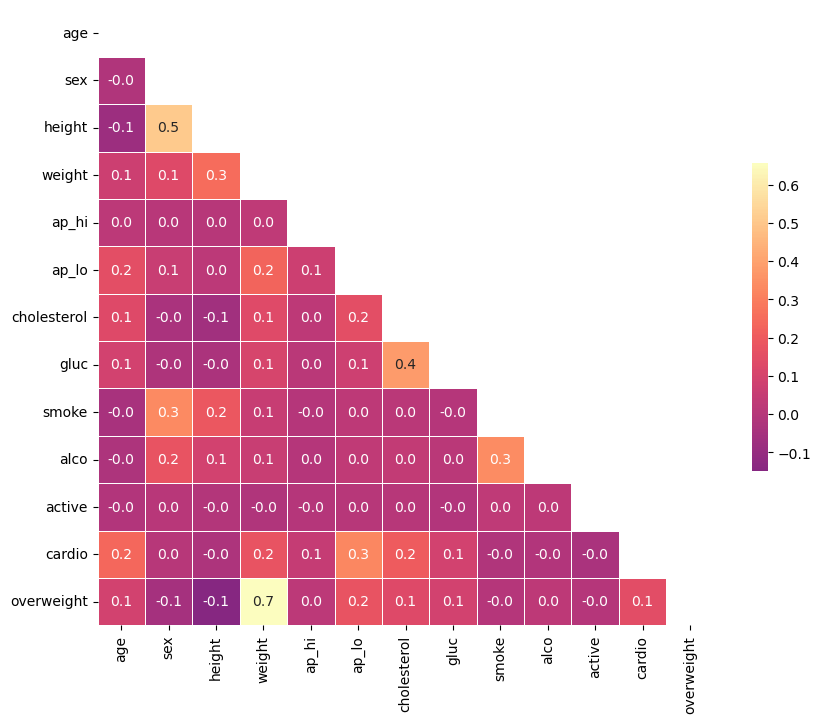

In [114]:
draw_heat_map()